<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ML_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

The mechanical properties of a material affect how it behaves as it is loaded. The elastic modulus of the material affects how much it deflects under a load, and the strength of the material determines the stresses that it can withstand before it fails. The ductility of a material also plays a significant role in determining when a material will break as it is loaded beyond its elastic limit. Because every mechanical system is subjected to loads during operation, it is important to understand how the materials that make up those mechanical systems behave. There are a lot of parameters to affect mechanical properties such as microstrucre, heat treatment, process method, composition etc.

Composition and heat treatment are most important parameters. They give information about mechanical properties of materials in many engineering applications. Many tests are carried out to examine the mechanical effects of these properties. Sometimes these tests are disadvantageous in terms of time and money. Machine learning methods have proven to be successful in the prediction of a large number of material properties. ML studies have established the unequivocal potential of this emerging discipline in accelerating discovery and design of new/improved materials. However, there still does not exist a standardized set of protocols for exploring this approach in a systematic manner on many potential applications, and thus, establishing the composition-processing-structure-property relationships still remains an arduous task.

#### DataSet
#### Reference:

1. https://link.springer.com/article/10.1186/2193-9772-3-8

2. https://www.kaggle.com/code/emrzcn/prediction-of-mechanical-properties-of-steels/notebook

Fatigue Dataset for Steel from National Institute of Material Science (NIMS) MatNavi was used in this work, which is one of the largest databases in the world with details on composition, mill product (upstream) features and subsequent processing (heat treatment) parameters. The database comprises carbon and low-alloy steels, carburizing steels and spring steels. Fatigue life data, which pertain to rotating bending fatigue tests at room temperature conditions, was the target property for which we aimed to construct predictive models in the current study. The features in the dataset can be categorized into the following:

*  Chemical composition - %C, %Si, %Mn, %P, %S, %Ni, %Cr, %Cu, %Mo (all in wt. %)
*  Upstream processing details - ingot size, reduction ratio, non-metallic inclusionsAgrawal et al.
*  Heat treatment conditions - temperature, time and other process conditions for normalizing, through-hardening, carburizing-quenching and tempering processes
*  Mechanical properties - YS, UTS, %EL, %RA, hardness, Charpy impact value (J/cm2), fatigue strength.[3]

The data used in this work has 437 instances/rows, **25 features/columns (composition and processing parameters)**, and **1 target property (fatigue strength).** The 437 data instances include 371 carbon and low alloy steels, 48 carburizing steels, and 18 spring steels. This data pertains to various heats of each grade of steel and different processing conditions.


## Variable Description

* C % - Carbon
* Si % - Silicon
* Mn % - Manganese
* P % - Phosphorus
* S % - Sulphur
* Ni % - Nickel
* Cr % - Chromium
* Cu % - Copper
* Mo % - Molybdenum
* NT - Normalizing Temperature
* THT - Through Hardening Temperature
* THt - Through Hardening Time
* THQCr - Cooling Rate for Through Hardening
* CT - Carburization Temperature
* Ct - Carburization Time
* DT - Diffusion Temperature
* Dt - Diffusion time
* QmT - Quenching Media Temperature (for Carburization)
* TT - Tempering Temperature
* Tt - Tempering Time
* TCr - Cooling Rate for Tempering
* RedRatio - Reduction Ratio (Ingot to Bar)
* dA  - Area Proportion of Inclusions Deformed by Plastic Work
* dB  -Area Proportion of Inclusions Occurring in Discontinuous Array
* dC  -Area Proportion of Isolated Inclusions
* Fatigue  - Rotating Bending Fatigue Strength (107 Cycles)



In [1]:
!pip install -q openpyxl

In [2]:
!wget https://static-content.springer.com/esm/art%3A10.1186%2F2193-9772-3-8/MediaObjects/40192_2013_16_MOESM1_ESM.xlsx

--2025-01-19 16:55:59--  https://static-content.springer.com/esm/art%3A10.1186%2F2193-9772-3-8/MediaObjects/40192_2013_16_MOESM1_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 151.101.0.95, 151.101.64.95, 151.101.128.95, ...
Connecting to static-content.springer.com (static-content.springer.com)|151.101.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91132 (89K) [application/octet-stream]
Saving to: ‘40192_2013_16_MOESM1_ESM.xlsx’

40192_2013_16_MOESM 100%[===================>]  89.00K  --.-KB/s    in 0.02s   

2025-01-19 16:56:00 (3.76 MB/s) - ‘40192_2013_16_MOESM1_ESM.xlsx’ saved [91132/91132]



In [3]:
!ls

40192_2013_16_MOESM1_ESM.xlsx  sample_data


In [4]:
# https://link.springer.com/article/10.1186/2193-9772-3-8#Sec29
# https://static-content.springer.com/esm/art%3A10.1186%2F2193-9772-3-8/MediaObjects/40192_2013_16_MOESM1_ESM.xlsx
# Note download this file and upload in slmat/jupyterlite
import pandas as pd
df = pd.read_excel('40192_2013_16_MOESM1_ESM.xlsx')
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [5]:
df.shape

(437, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [7]:
df.describe()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,126.295289,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,1.000000,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,110.000000,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,219.000000,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,328.000000,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,437.000000,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


#### Data histograms

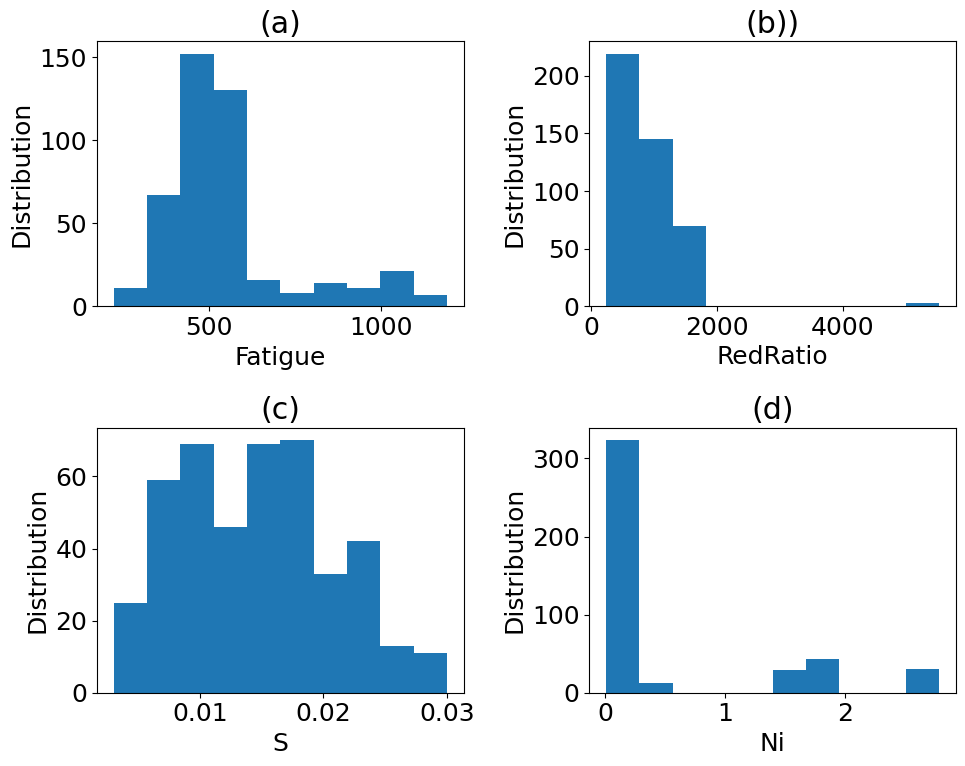

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

the_grid = GridSpec(2, 2)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))

plt.subplot(the_grid[0, 0])
val=np.array(df['Fatigue'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)
#plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('Fatigue')
plt.ylabel('Distribution')
plt.title('(a)')


plt.subplot(the_grid[0, 1])
val=np.array(df['RedRatio'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)
#plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('RedRatio')
plt.ylabel('Distribution')
plt.title('(b))')


plt.subplot(the_grid[1, 0])
val=np.array(df['S'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)
#plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('S')
plt.ylabel('Distribution')
plt.title('(c)')


plt.subplot(the_grid[1, 1])
val=np.array(df['Ni'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)
#plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('Ni')
plt.ylabel('Distribution')
plt.title('(d)')

plt.tight_layout()

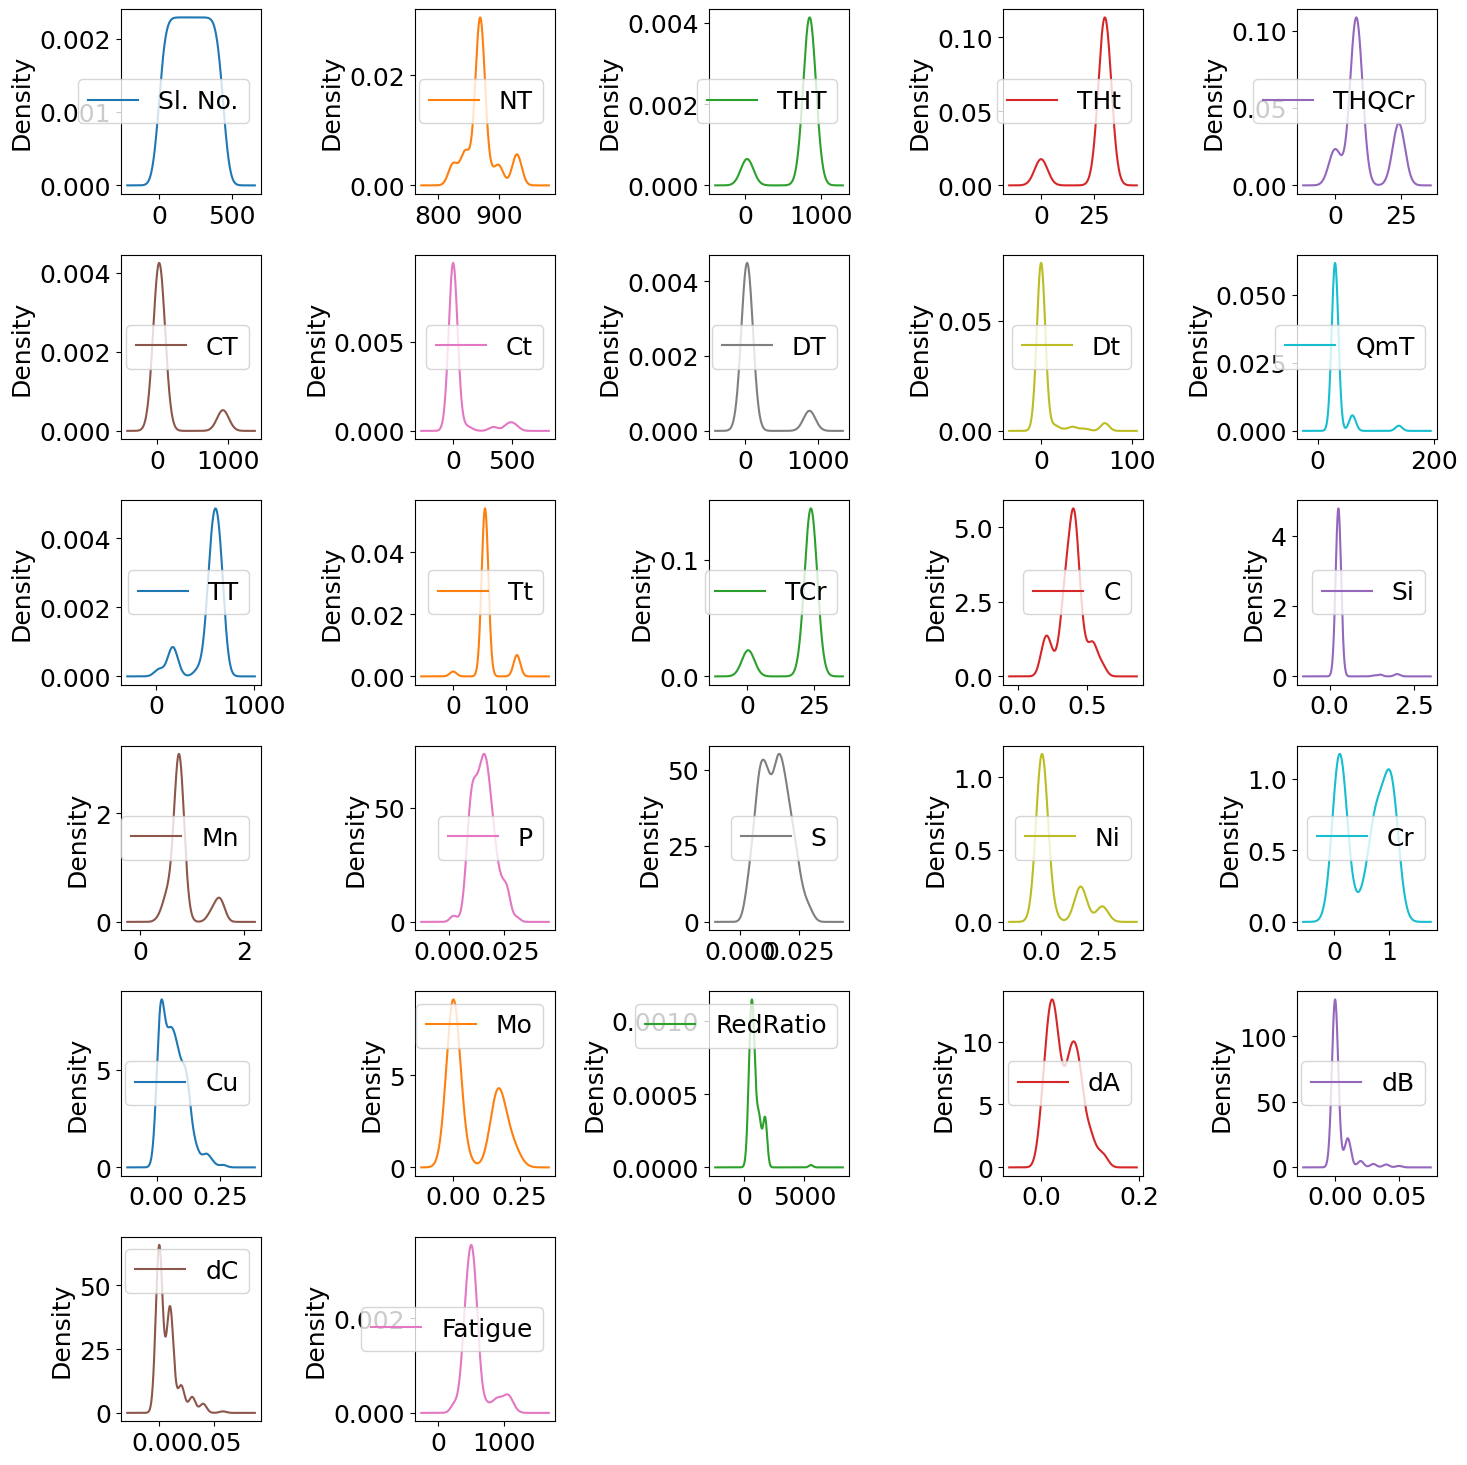

In [9]:
# Another way of plotting data distribution
df.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));

plt.tight_layout()

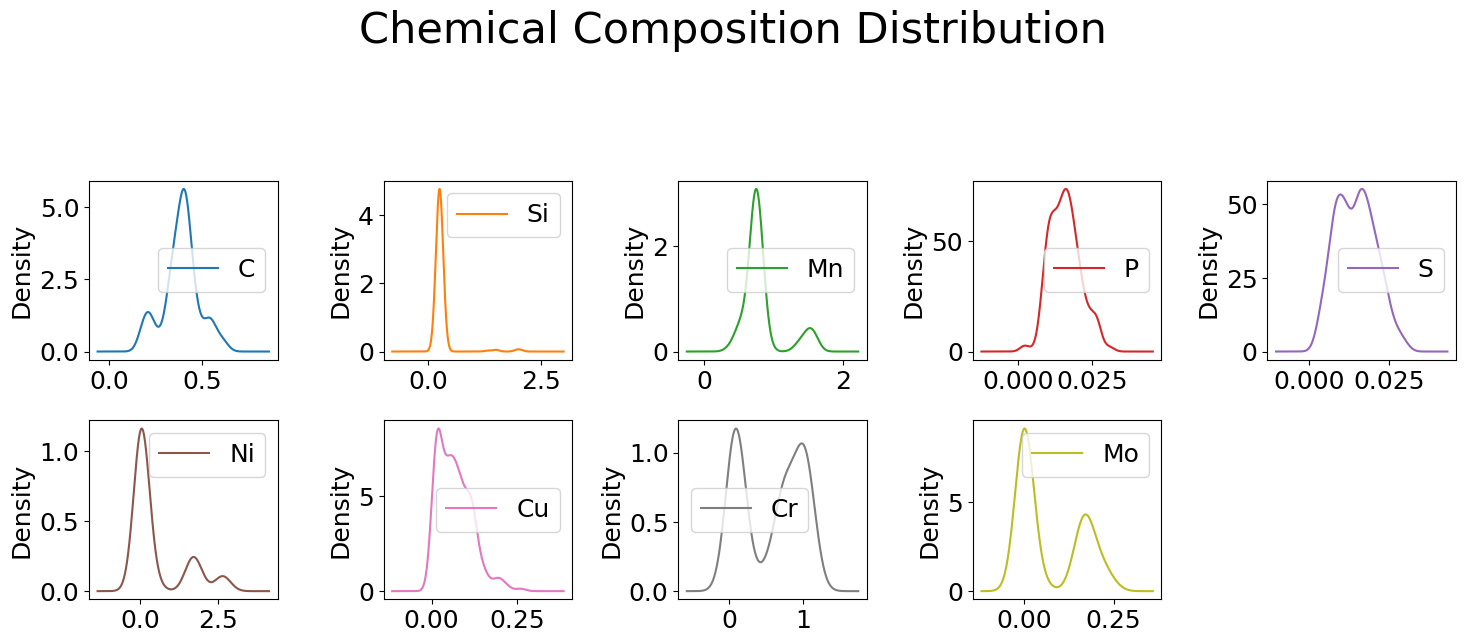

In [10]:
# Just chemical composition plot
df_1 = df[["C", "Si", "Mn", "P", "S", "Ni", "Cu", "Cr", "Mo"]]
df_1.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.suptitle("Chemical Composition Distribution",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout()

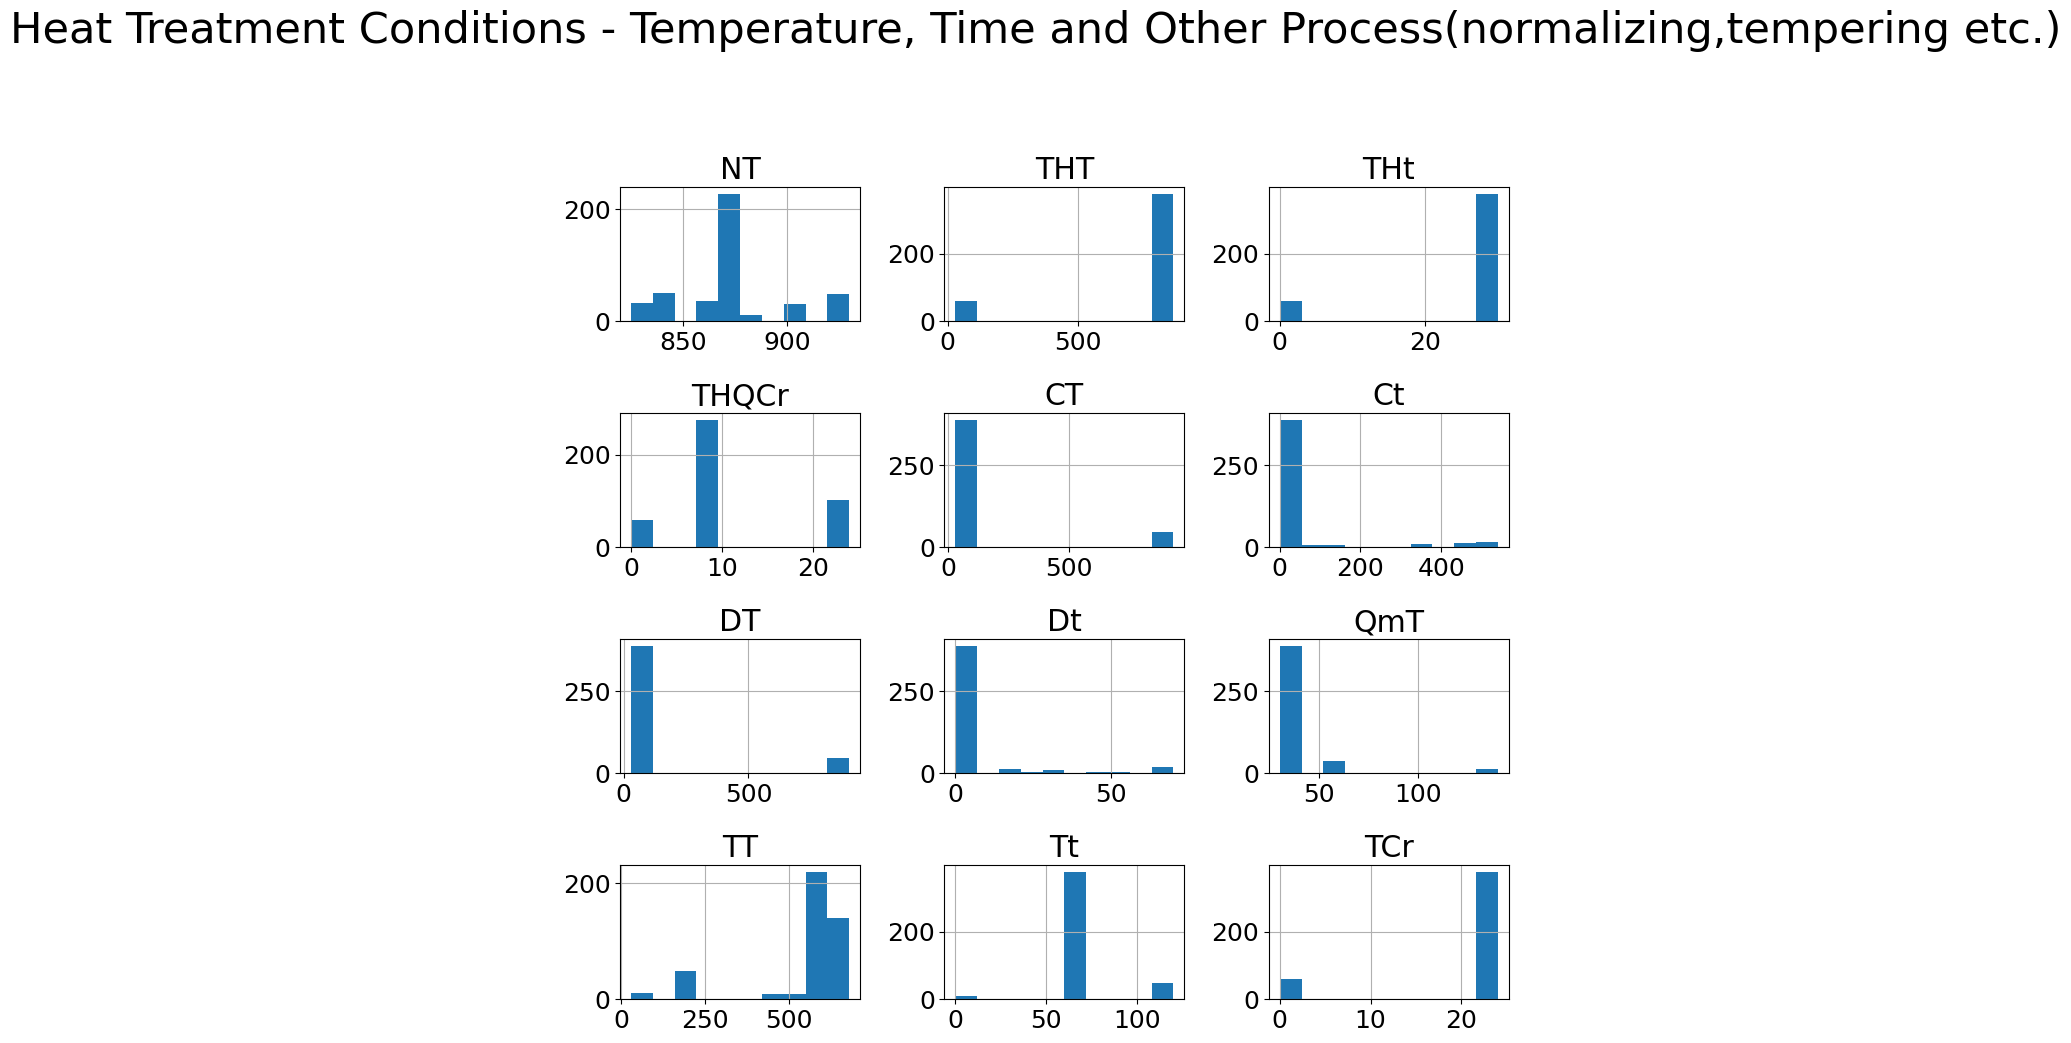

In [11]:
df_2 = df[['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr']]
df_2.hist(figsize=(10, 10));
plt.suptitle("Heat Treatment Conditions - Temperature, Time and Other Process(normalizing,tempering etc.)",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout();

<Axes: >

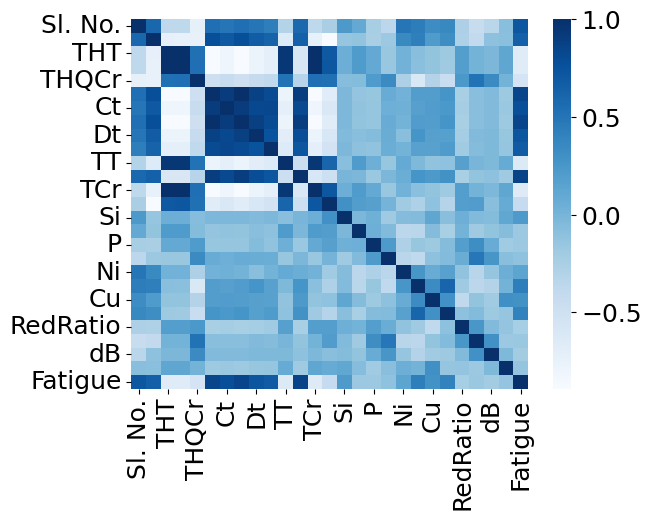

In [12]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=False)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


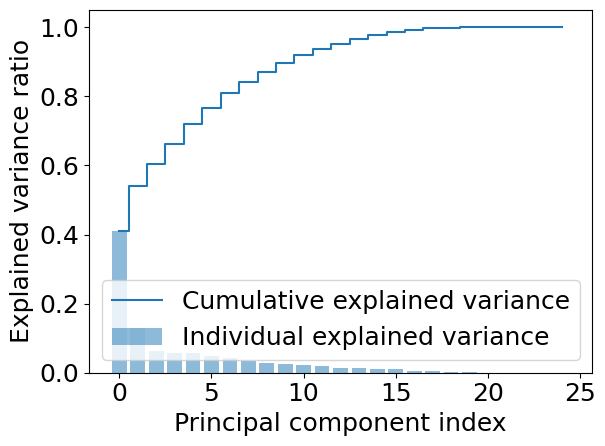

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_excel('40192_2013_16_MOESM1_ESM.xlsx')
df.drop(columns=['Sl. No.'], inplace = True)
X = df.drop(["Fatigue"], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()  # Reduce to 20 principal components
X_pca = pca.fit_transform(X_scaled)
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# ##################
# https://vitalflux.com/pca-explained-variance-concept-python-example/
# # Apply PCA
# pca = PCA(n_components=20)  # Reduce to 2 principal components
# X_pca = pca.fit_transform(X_scaled)

# # Explained variance
# explained_variance = pca.explained_variance_ratio_
# print("Explained variance by each component:", explained_variance)

# # Plot the PCA-transformed data
# plt.figure(figsize=(10, 6))
# plt.plot(explained_variance,'-o')
# plt.axhline(y=0.05, color='r', linestyle='--')
# plt.xlabel('Component')
# plt.ylabel('Explained Variance')
# plt.show()


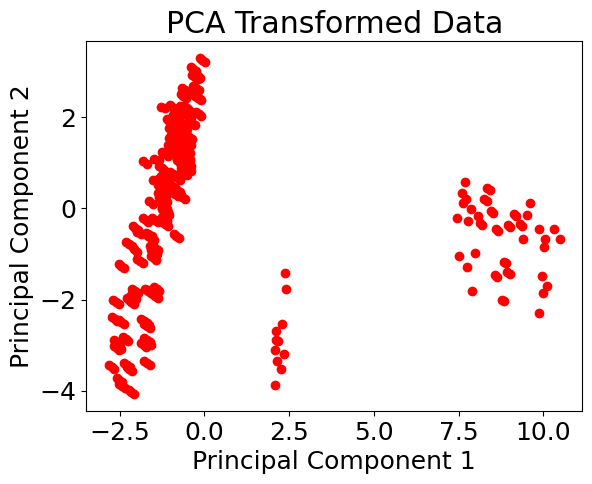

In [14]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='r')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Modeling
1. Linear Regression
2. RandomForest
3. GBM
4. MLP



#### Linear Regression

MAE:  24.866119152828517
R2:  0.9749818499365817


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Text(0, 0.5, 'Predicted')

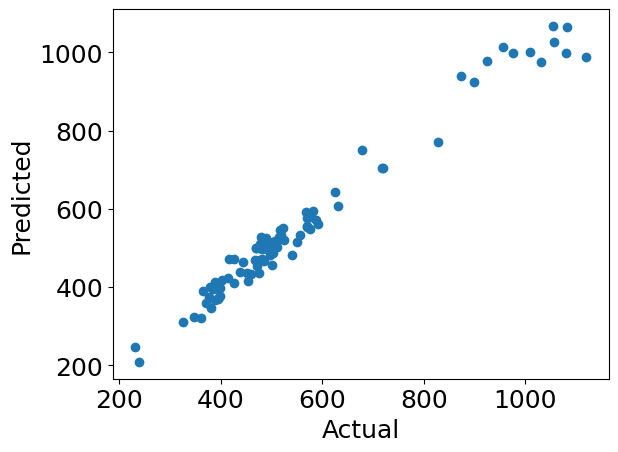

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df = pd.read_excel('40192_2013_16_MOESM1_ESM.xlsx')
df.drop(columns=['Sl. No.'], inplace = True)
X = df.drop(["Fatigue"], axis = 1)
y = df["Fatigue"]
# 80 % training-20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
# Linear regression from sklearn package
lm = LinearRegression()
pred = lm.fit(X_train, y_train).predict(X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("R2: ", r2_score(y_test, pred))
# data on x = y i.e. 45 degree line represent good agreement
plt.plot(y_test, pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#### RandomForest

MAE:  18.726590909090906
R2:  0.9861468035269992


Text(0, 0.5, 'Predicted')

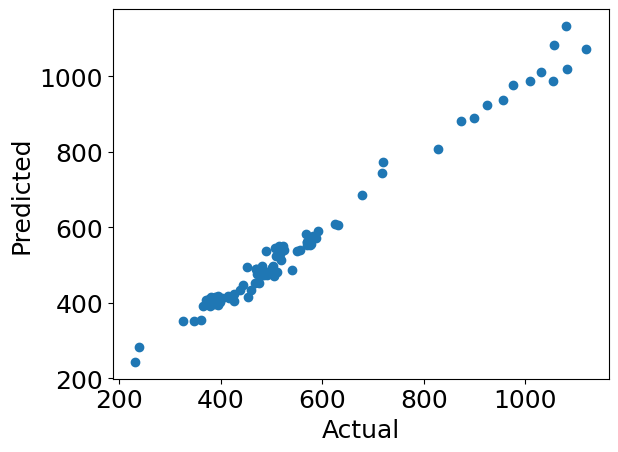

In [16]:
# Comapre with RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("R2: ", r2_score(y_test, pred))
# data on x = y i.e. 45 degree line represent good agreement
plt.plot(y_test, pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

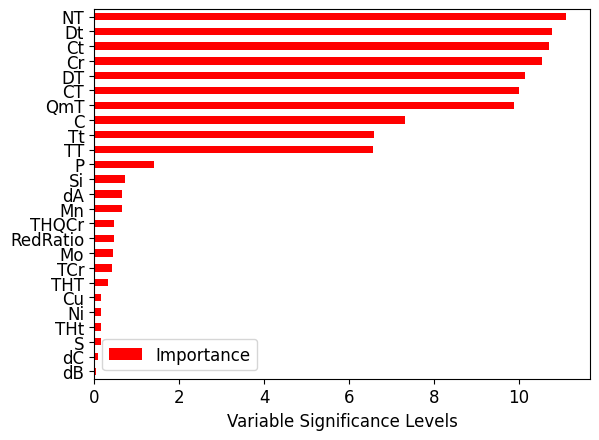

In [17]:
# Feature Importance plot
plt.rcParams.update({'font.size': 12})
Importance = pd.DataFrame({"Importance": model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r");

plt.xlabel("Variable Significance Levels");

MAE:  15.636202390266776
R2:  0.989480496285216


Text(0, 0.5, 'Predicted')

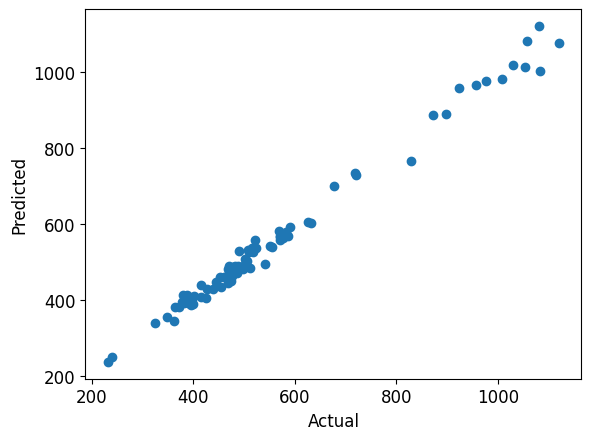

In [18]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
model = gbm_model.fit(X_train, y_train)
pred = gbm_model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("R2: ", r2_score(y_test, pred))
# data on x = y i.e. 45 degree line represent good agreement
plt.plot(y_test, pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

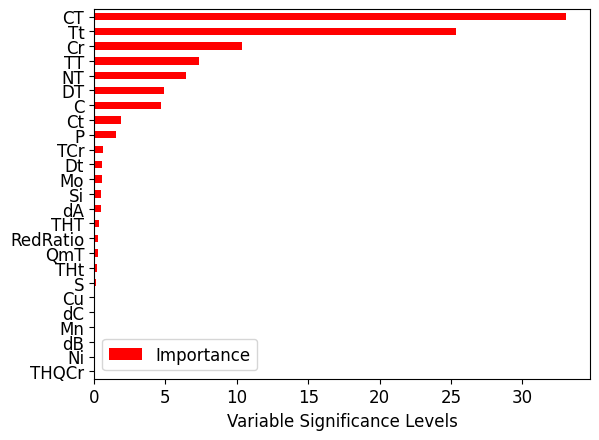

In [19]:
plt.rcParams.update({'font.size': 12})
Importance = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r");

plt.xlabel("Variable Significance Levels");